# Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Period 1

In [3]:
df_p1 = pd.read_csv('./output/data_02.csv',sep=',',index_col=0)

In [4]:
df_p1.loc[df_p1['DateTime'] == '2010-05-17 00:00:00']

,DateTime,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
864,2010-05-17 00:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.0,0.5,0.0,23.0,5.52,0.0,0.0,0.0


In [5]:
df_p1.drop(df_p1.index[0:864],inplace=True)
df_p1 = df_p1.reset_index(drop=True)
df_p1.shape

(16272, 33)

In [6]:
display(df_p1.head(1),df_p1.tail(1))

,DateTime,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
0,2010-05-17 00:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.0,0.5,0.0,23.0,5.52,0.0,0.0,0.0


,DateTime,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
16271,2010-09-06 23:50:00,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28.56,0.0,0.0,0.0


In [7]:
df_p1.loc[df_p1['DateTime'] == '2010-06-13 23:50:00']

,DateTime,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
4031,2010-06-13 23:50:00,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.65,0.0,0.0,0.0


In [8]:
df_p1.drop(df_p1.index[4032:],inplace=True)
df_p1 = df_p1.reset_index(drop=True)
df_p1.shape

(4032, 33)

In [9]:
display(df_p1.head(1),df_p1.tail(1))

,DateTime,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
0,2010-05-17 00:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.0,0.5,0.0,23.0,5.52,0.0,0.0,0.0


,DateTime,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
4031,2010-06-13 23:50:00,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.65,0.0,0.0,0.0


In [10]:
df_p1 = df_p1.drop(['DateTime'], axis=1)

In [11]:
df_p1['Periods'] = 'Period1'

In [12]:
display(df_p1.head(1),df_p1.tail(1))

,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,M010,...,M026,M027,M028,M029,T002,P001,D001,D002,D003,Periods
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.5,0.0,23.0,5.52,0.0,0.0,0.0,Period1


,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,M010,...,M026,M027,M028,M029,T002,P001,D001,D002,D003,Periods
4031,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.65,0.0,0.0,0.0,Period1


### Period 2

In [13]:
df_p2 = pd.read_csv('./output/data_02.csv',sep=',',index_col=0)

In [14]:
df_p2.loc[df_p2['DateTime'] == '2010-06-14 00:00:00']

,DateTime,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
4896,2010-06-14 00:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_p2.drop(df_p2.index[0:4896],inplace=True)
df_p2 = df_p2.reset_index(drop=True)
df_p2.shape

(12240, 33)

In [16]:
df_p2.loc[df_p2['DateTime'] == '2010-07-11 23:50:00']

,DateTime,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
4031,2010-07-11 23:50:00,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.15,0.0,0.0,0.0


In [17]:
df_p2.drop(df_p2.index[4032:],inplace=True)
df_p2 = df_p2.reset_index(drop=True)
df_p2.shape

(4032, 33)

In [18]:
display(df_p2.head(1),df_p2.tail(1))

,DateTime,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
0,2010-06-14 00:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,DateTime,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
4031,2010-07-11 23:50:00,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.15,0.0,0.0,0.0


In [19]:
df_p2 = df_p2.drop(['DateTime'], axis=1)

In [20]:
df_p2['Periods'] = 'Period2'

In [21]:
display(df_p2.head(1),df_p2.tail(1))

,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,M010,...,M026,M027,M028,M029,T002,P001,D001,D002,D003,Periods
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Period2


,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,M010,...,M026,M027,M028,M029,T002,P001,D001,D002,D003,Periods
4031,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.15,0.0,0.0,0.0,Period2


### Period 3

In [22]:
df_p3 = pd.read_csv('./output/data_02.csv',sep=',',index_col=0)

In [23]:
df_p3.loc[df_p3['DateTime'] == '2010-07-12 00:00:00']

,DateTime,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
8928,2010-07-12 00:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,24.89,0.0,0.0,0.0


In [24]:
df_p3.drop(df_p3.index[0:8928],inplace=True)
df_p3 = df_p3.reset_index(drop=True)
df_p3.shape

(8208, 33)

In [25]:
df_p3.loc[df_p3['DateTime'] == '2010-08-08 23:50:00']

,DateTime,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
4031,2010-08-08 23:50:00,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0


In [26]:
df_p3.drop(df_p3.index[4032:],inplace=True)
df_p3 = df_p3.reset_index(drop=True)
df_p3.shape

(4032, 33)

In [27]:
display(df_p3.head(1),df_p3.tail(1))

,DateTime,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
0,2010-07-12 00:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,24.89,0.0,0.0,0.0


,DateTime,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
4031,2010-08-08 23:50:00,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0


In [28]:
df_p3 = df_p3.drop(['DateTime'], axis=1)

In [29]:
df_p3['Periods'] = 'Period3'

In [30]:
display(df_p3.head(1),df_p3.tail(1))

,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,M010,...,M026,M027,M028,M029,T002,P001,D001,D002,D003,Periods
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,24.89,0.0,0.0,0.0,Period3


,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,M010,...,M026,M027,M028,M029,T002,P001,D001,D002,D003,Periods
4031,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,Period3


### Period 4

In [31]:
df_p4 = pd.read_csv('./output/data_02.csv',sep=',',index_col=0)

In [32]:
df_p4.loc[df_p4['DateTime'] == '2010-08-09 00:00:00']

,DateTime,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
12960,2010-08-09 00:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_p4.drop(df_p4.index[0:12960],inplace=True)
df_p4 = df_p4.reset_index(drop=True)
df_p4.shape

(4176, 33)

In [34]:
df_p4.loc[df_p4['DateTime'] == '2010-09-05 23:50:00']

,DateTime,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
4031,2010-09-05 23:50:00,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.18,0.0,0.0,0.0


In [35]:
df_p4.drop(df_p4.index[4032:],inplace=True)
df_p4 = df_p4.reset_index(drop=True)
df_p4.shape

(4032, 33)

In [36]:
display(df_p4.head(1),df_p4.tail(1))

,DateTime,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
0,2010-08-09 00:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,DateTime,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,...,M025,M026,M027,M028,M029,T002,P001,D001,D002,D003
4031,2010-09-05 23:50:00,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.18,0.0,0.0,0.0


In [37]:
df_p4 = df_p4.drop(['DateTime'], axis=1)

In [38]:
df_p4['Periods'] = 'Period4'

In [39]:
display(df_p4.head(1),df_p4.tail(1))

,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,M010,...,M026,M027,M028,M029,T002,P001,D001,D002,D003,Periods
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Period4


,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,M010,...,M026,M027,M028,M029,T002,P001,D001,D002,D003,Periods
4031,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.18,0.0,0.0,0.0,Period4


## Clustering DF

In [40]:
df_c = pd.concat([df_p1,df_p2,df_p3,df_p4]).reset_index(drop=True)

In [41]:
df_c.shape

(16128, 33)

In [42]:
df_c.head()

,DayWeek,M001,M002,M003,M004,M005,M006,M007,M009,M010,...,M026,M027,M028,M029,T002,P001,D001,D002,D003,Periods
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.5,0.0,23.0,5.52,0.0,0.0,0.0,Period1
1,0,0.0,0.0,0.5,0.0,0.0,0.5,0.5,0.5,0.5,...,0.5,0.0,0.0,0.0,0.0,2.31,0.5,0.0,0.0,Period1
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.64,0.0,0.0,0.0,Period1
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.5,0.0,0.5,0.0,0.0,0.00,0.0,0.0,0.0,Period1
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.5,0.5,0.0,0.0,11.38,0.0,0.0,0.0,Period1


In [43]:
df_c.columns

Index(['DayWeek', 'M001', 'M002', 'M003', 'M004', 'M005', 'M006', 'M007',
       'M009', 'M010', 'M011', 'M012', 'M013', 'M014', 'M015', 'M016', 'M018',
       'M020', 'M021', 'M022', 'M023', 'M024', 'M025', 'M026', 'M027', 'M028',
       'M029', 'T002', 'P001', 'D001', 'D002', 'D003', 'Periods'],
      dtype='object')

In [44]:
cols = [col for col in df_c.columns.values if col != "Periods"]
X = df_c[cols]
y = df_c["Periods"]

In [45]:
X = StandardScaler().fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [46]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
print('Silhouette Score for 4 clusters:', (silhouette_score(X, kmeans.predict(X))))

Silhouette Score for 4 clusters: 0.4966219975941122


In [47]:
X = pd.DataFrame(X,columns=['DayWeek', 'M001', 'M002', 'M003', 'M004', 'M005', 'M006', 'M007', 'M009',
                            'M010', 'M011', 'M012', 'M013', 'M014', 'M015', 'M016', 'M018', 'M020',
                            'M021', 'M022', 'M023', 'M024', 'M025', 'M026', 'M027', 'M028', 'M029',
                            'T002', 'P001', 'D001', 'D002', 'D003'])

In [48]:
X['labels'] = kmeans.labels_

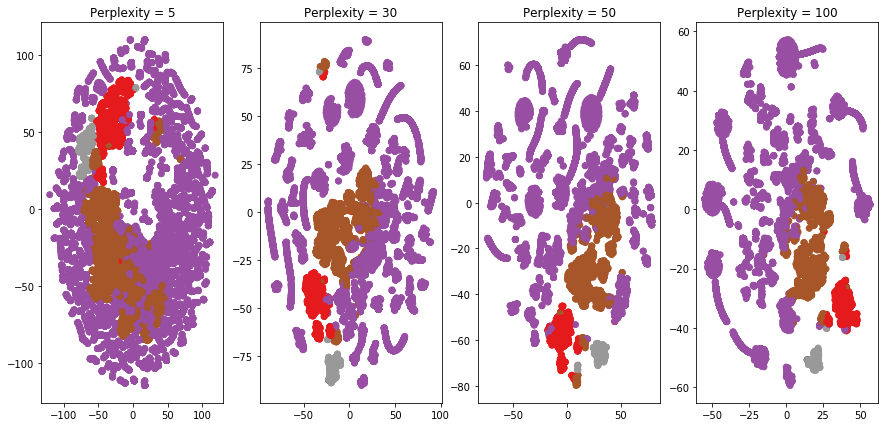

CPU times: user 15min 54s, sys: 30.8 s, total: 16min 25s
Wall time: 16min 23s


In [49]:
%%time
fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=X.labels, cmap='Set1')
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()

In [ ]:
sns.set(style="ticks")
sns.pairplot(X,hue='labels')